In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
# number of people left the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
# remove unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# one-hot encode categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True).astype(int)

In [21]:
# scaling
X = df.drop('Exited', axis=1)
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-30 11:02:46.575633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753873366.816101      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753873366.888721      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [53]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8723 - loss: 0.3154 - val_accuracy: 0.8531 - val_loss: 0.3458
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3075 - val_accuracy: 0.8525 - val_loss: 0.3460
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3142 - val_accuracy: 0.8544 - val_loss: 0.3465
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3165 - val_accuracy: 0.8500 - val_loss: 0.3492
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3238 - val_accuracy: 0.8519 - val_loss: 0.3484
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.3154 - val_accuracy: 0.8494 - val_loss: 0.3492
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3257 - val_accuracy: 0.8537 - val_loss: 0.3473
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.3089 - val_accu

In [64]:
# get the weights of first layer
model.layers[0].get_weights()

[array([[ 0.06118416,  0.47744933,  0.01815264,  0.08020674, -0.60454357,
          0.07391528,  0.08208798,  0.5450726 ,  0.04907728,  0.02289175,
          0.14327994],
        [-0.53937054,  0.57248515, -0.9807124 , -0.9727151 , -0.4972474 ,
         -0.30640116,  0.21163334, -0.77161014,  1.306536  ,  0.91259366,
          0.2033715 ],
        [-0.35942745,  0.07003199, -0.11560763,  0.31185108,  0.42030913,
          0.12016167,  0.17911094, -0.13781233, -0.22739318,  0.19329096,
          0.5766851 ],
        [-0.40771028, -0.8846867 ,  0.0284831 , -0.01370123, -0.12095204,
         -0.82459927, -0.19010705,  0.07030097,  0.26457027, -0.57961833,
         -0.8227443 ],
        [ 0.09123278,  0.07647242,  0.04045514, -0.28269812, -0.11172831,
         -1.0764513 ,  1.4062457 ,  0.08395986, -0.4905463 ,  0.15804425,
         -0.25275746],
        [-0.13295309, -0.32047355,  0.03546356,  0.35257158,  0.07411005,
         -0.03675408, -0.10840703, -0.357464  , -0.11773513,  0.0959235

In [65]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [66]:
# assuming threshold as 0.5
y_pred = np.where(y_log > 0.5, 1, 0)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.861

In [68]:
import matplotlib.pyplot as plt

In [69]:
history.history

{'accuracy': [0.8692187666893005,
  0.870312511920929,
  0.8704687356948853,
  0.8696874976158142,
  0.8707812428474426,
  0.8717187643051147,
  0.8693749904632568,
  0.871874988079071,
  0.8701562285423279,
  0.8717187643051147,
  0.8692187666893005,
  0.8707812428474426,
  0.8704687356948853,
  0.8715624809265137,
  0.8709375262260437,
  0.8684375286102295,
  0.8712499737739563,
  0.8709375262260437,
  0.8706250190734863,
  0.870312511920929,
  0.870312511920929,
  0.870312511920929,
  0.8700000047683716,
  0.8725000023841858,
  0.8704687356948853,
  0.8709375262260437,
  0.8714062571525574,
  0.8698437213897705,
  0.8720312714576721,
  0.8698437213897705,
  0.8706250190734863,
  0.8720312714576721,
  0.8709375262260437,
  0.8712499737739563,
  0.8707812428474426,
  0.87109375,
  0.8712499737739563,
  0.8706250190734863,
  0.8717187643051147,
  0.8720312714576721,
  0.8714062571525574,
  0.8704687356948853,
  0.8709375262260437,
  0.8707812428474426,
  0.8717187643051147,
  0.8726562

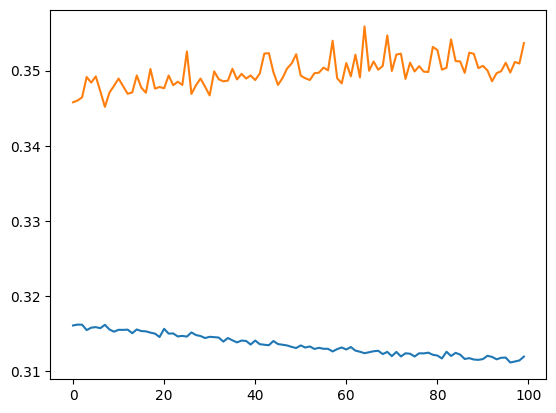

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

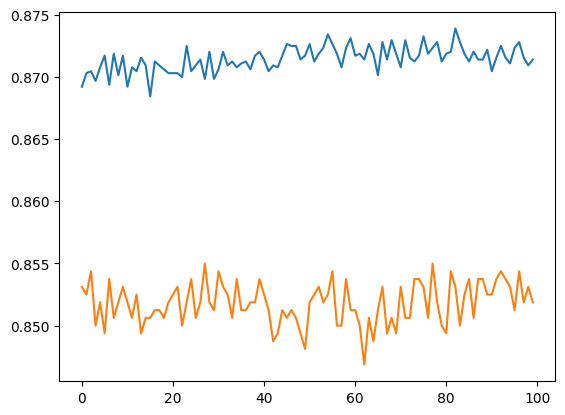

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])